In [1]:
# 数据集读入
import numpy as np
from sklearn.datasets import load_iris


iris_dataset = load_iris()
print(dir(iris_dataset))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [2]:
# 数据集处理: 抽取坐标&标准化

X = iris_dataset['data']
Y = iris_dataset['target']

from sklearn.preprocessing import StandardScaler

XX = StandardScaler().fit_transform(X)

In [3]:
# 自定义函数

# 将预测聚类分析type结果与源结果匹配
def match_pre(predict_ans):
    """ 匹配预测结果与实际结果 """
    relation = {}
    for i in range(3):
        # 选取类别为i数据的预测值
        ori_i_cluster_judge = Y == i
        predict_of_ori_cluster = predict_ans[ori_i_cluster_judge]
        # 求众数并调整列表标号
        pre_i = np.argmax(np.bincount(predict_of_ori_cluster))
        relation.update({pre_i:i})

    for pre_i in range(3):
        predict_ans[predict_ans==pre_i] = relation[pre_i] + 1
    return predict_ans - 1

# 图像输出
def show_results(x, y, predict_Y):
    """ plt输出预测结果与原结果 """
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(1)
    plt.scatter(XX[:,x], XX[:,y], c=predict_Y)
    plt.title("Predict")
    plt.figure(2)
    plt.scatter(XX[:,x], XX[:,y], c=Y)
    plt.title("Origin")
    plt.show()

    # 输出正确率
    rate_acc = predict_Y[Y==predict_Y].size / Y.size
    print("accurate rate : ", rate_acc)

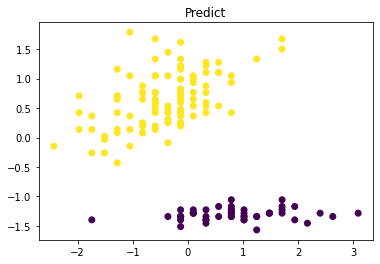

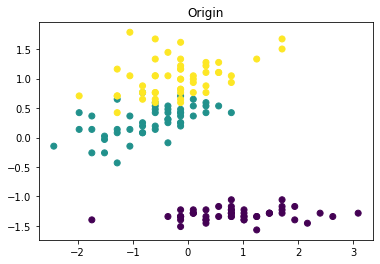

accurate rate :  0.6666666666666666


In [4]:
# K-means算法聚类分析(init=‘k-means++’)
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3)

kmeans_model.fit(XX)

predict_kmeans = kmeans_model.predict(XX)

# 匹配预测结果与实际结果
predict_matched_kmeans = match_pre(predict_kmeans)

show_results(1, 2, predict_matched_kmeans)

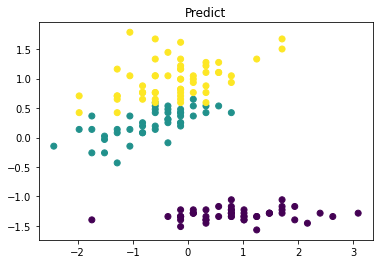

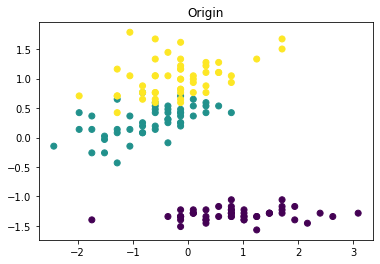

accurate rate :  0.9666666666666667


In [5]:
# 高斯混合EM聚类

from sklearn.mixture import GaussianMixture

gm_model = GaussianMixture(n_components=3)

gm_model.fit(XX)

predict_gm = gm_model.predict(XX)

predict_matched_gm = match_pre(predict_gm)

show_results(1, 2, predict_matched_gm)

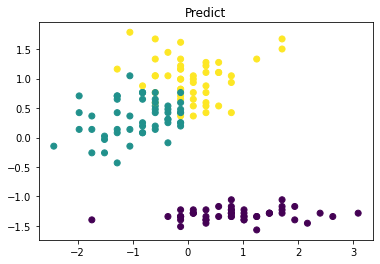

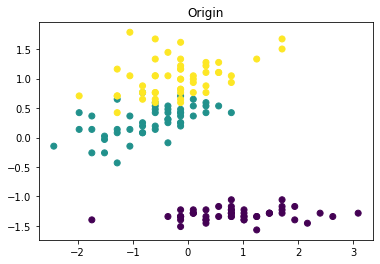

accurate rate :  0.84


In [6]:
# 谱聚类
from sklearn.cluster import SpectralClustering

spectral_model = SpectralClustering(n_clusters=3,assign_labels="discretize", random_state=0)

spectral_model.fit(XX)

predict_spectral = spectral_model.fit_predict(XX)

predict_matched_spectral = match_pre(predict_spectral)

show_results(1, 2, predict_matched_spectral)